# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [145]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [146]:
# Your code here

def alpha_func(D, idx):
    X = 'Sepal.Width'
    Y = 'Sepal.Length'
    cov_ = np.cov(D[[X, Y]].loc[idx], rowvar=False)
    return ((cov_[1,1] - cov_[0,1]) /
           (cov_[0,0]+cov_[1,1]-2*cov_[0,1]))

Test the code below

In [147]:
alpha_func(df, range(100))

0.6189498510165619

_(ii)_ Construct a new bootstrap data set and recompute alpha

In [148]:
rng = np.random.default_rng(0)
alpha_func(df,
           rng.choice(100,
                      100,
                      replace=True))

0.6675354865158225

Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?  

Simply calculating the mean might not account for the variability or uncertainty in the estimate. Bootstrapping helps us understand the distribution of sample statistics (like the mean) and provides confidence intervals, giving us a range of plausible values for the population parameter.

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

In [149]:
# Add your code here to set the seed
bootstrap_values = []

def boot_SE(D=df, B=1000, seed=0):
    rng = np.random.default_rng(seed)
    
    n = D.shape[0]
    for i in range(B):
        idx = rng.choice(D.index,
                         n,
                         replace=True)
        value = alpha_func(D, idx)
        bootstrap_values.append(value)
        
    return np.std(np.array(bootstrap_values))
    

_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [150]:
# Your code here
alpha_SE = boot_SE(df,
                   B=1000,
                   seed=0)
alpha_SE

0.03180510076860767

_(vi)_ What is the original mean value of `Sepal.Length`?

In [151]:
np.mean(np.array(df['Sepal.Length']))

5.843333333333334

Next, let's create a new bootstrapping to bootstrap samples (`boot_se_samples`) of `Sepal.Length`, in order to compute its bootstrapped mean and standard deviation.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value. Then, review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

Original mean is 5.843333333333334, bootstrapped mean is 5.842284666666666

Based on this comparison, we can conclude that the bootstrapped mean provides a highly accurate estimate of the original mean of 5.843333333333334 for Sepal.Length. The small difference observed is within expected variability due to sampling, confirming the robustness of the bootstrap method in estimating population statistics.

In [152]:
# Function to bootstrap 'Sepal.Length'
boot_se_samples = []

def boot_se(D=df, B=1000, seed=0):
    rng = np.random.default_rng(seed)
      
    n = D.shape[0]
    for i in range(B):
        idx = rng.choice(D.index, n, replace=True)
        boot_sample_mean = np.mean(D.loc[idx, 'Sepal.Length'])  # Compute mean for each bootstrap sample
        boot_se_samples.append(boot_sample_mean)  # Append mean to boot_se_samples list
        
    return boot_se_samples


bootstrap_samples = boot_se(df)

# Convert to numpy array for calculations
bootstrap_samples = np.array(bootstrap_samples)

# Compute bootstrapped mean
bt_mean = np.mean(bootstrap_samples)
print(bt_mean)

# Compute bootstrapped standard deviation
bt_std = np.std(bootstrap_samples, ddof=1)
print(bt_std)

# Compute bootstrapped range using np.ptp (peak to peak)
t_range = np.ptp(bootstrap_samples)
print(t_range)

5.842284666666666
0.06652622735460917
0.3873333333333342


_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris sepal length. (Hint: use the `np.percentile` function)

In [153]:
conf_int = np.percentile(boot_se_samples, [2.5, 97.5])
print(conf_int)

[5.71861667 5.97471667]


_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

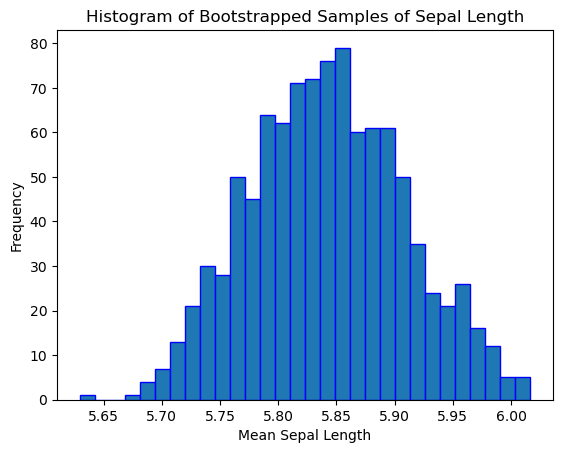

In [154]:
#Complete this

# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
#Add your code here
ax.hist(bootstrap_samples, bins=30, edgecolor='blue')

# Add a title
#Add your code here
ax.set_title('Histogram of Bootstrapped Samples of Sepal Length')

# Add a label to the x-axis
#Add your code here
ax.set_xlabel('Mean Sepal Length')

# Add a label to the y-axis
#Add your code here
ax.set_ylabel('Frequency')

# Show the plot
plt.show()

_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

In [155]:
# Write your answer here
'''
I would recommend using the bootstrapped mean value of 5.8423 units as the estimated average length of iris petals.
It's important to consider the variability (standard deviation) and the confidence interval to understand the uncertainty around this estimate.
The company should allocate space on the shipment based on this estimated average length, but we should not forget about the possible variability indicated by the standard deviation and confidence interval.
Knowith all these, the shipping company can make informed decisions regarding space allotment for the shipment, taking into account both the estimated average length and its associated uncertainty.
This approach ensures that the decision is grounded in statistical analysis and considers the potential variability in the data.'''

"\nI would recommend using the bootstrapped mean value of 5.8423 units as the estimated average length of iris petals.\nIt's important to consider the variability (standard deviation) and the confidence interval to understand the uncertainty around this estimate.\nThe company should allocate space on the shipment based on this estimated average length, but we should not forget about the possible variability indicated by the standard deviation and confidence interval.\nKnowith all these, the shipping company can make informed decisions regarding space allotment for the shipment, taking into account both the estimated average length and its associated uncertainty.\nThis approach ensures that the decision is grounded in statistical analysis and considers the potential variability in the data."

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
